# 1. Introduction
TikTok users have the ability to report videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. This process generates a large number of user reports that are difficult to address quickly.

The data team of TikTok wants to develop a machine learning model to classify claims made in videos submitted to the platform by the users.

# 2. Preliminary Data Inspection

In [101]:
# Importing the relevant libraries
import numpy as np
import pandas as pd

In [103]:
# Load the dataset
data = pd.read_csv('Documents/tiktok_dataset.csv')

In [105]:
# Get the shape of the data
data.shape

(19382, 12)

In [107]:
# Display the first several rows of the DataFrame
data.head(n = 10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [109]:
# Get summary info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [111]:
# Get summary statistics of the data
data.describe(include = "all")

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


In [113]:
# Investigate the class balance for the `claim_status` variable
data["claim_status"].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [115]:
# Determine the average view counts of 'claim' videos
data_claims = data[data["claim_status"] == "claim"]
print("Mean:", "%.2f" % data_claims["video_view_count"].mean())
print("Median:", data_claims["video_view_count"].median())

Mean: 501029.45
Median: 501555.0


In [117]:
# Determine the average view counts of 'o' videos
data_opinions = data[data["claim_status"] == "opinion"]
print("Mean:", "%.2f" % data_opinions["video_view_count"].mean())
print("Median:", data_opinions["video_view_count"].median())

Mean: 4956.43
Median: 4953.0


The videos with 'claim' status have much higher view counts and engagement than the videos with 'opinion' status.

In [120]:
# Get counts for each group combination of claim status and author ban status
data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

The number of banned authors from claim videos are significantly higher than banned authors from opinion videos. A potential explanation could be claims being reported are penalised more than opinions.

We will now investigate the `author_ban_status` variable.

In [124]:
data.groupby(['author_ban_status']).agg({
    'video_view_count': ['mean', 'median'],
    'video_like_count': ['mean', 'median'],
    'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [126]:
# Group by author_ban_status and calculate the median of video_share_count
data.groupby(['author_ban_status']).agg({'video_share_count': 'median'})

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


The videos of banned authors being shared are much higher than active users. This suggests the possibility of the videos containing controversial content and hence gathered more engagement.

In [129]:
data.groupby(['author_ban_status']).agg({'video_view_count': ['count','mean', 'median'],
    'video_like_count': ['count','mean', 'median'],
    'video_share_count': ['count','mean', 'median']})

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

Banned and under review users have higher views, likes, and shares than active users. The mean values are significantly higher than median, suggesting outlier videos with very high engagement. 

In [132]:
# Create `likes_per_view`, `comments_per_view`, and `shares_per_view` to better understand engagement rates
data_er = data.copy()

data_er['likes_per_view'] = data_er['video_like_count'] / data_er['video_view_count']
data_er['comments_per_view'] = data_er['video_comment_count'] / data_er['video_view_count']
data_er['shares_per_view'] = data_er['video_share_count'] / data_er['video_view_count']

data_er.groupby(['claim_status', 'author_ban_status']).agg({
    'likes_per_view': ['count','mean', 'median'],
    'comments_per_view': ['count','mean', 'median'],
    'shares_per_view': ['count','mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

Previously, we know that banned and under review authors have higher views, likes, and shares than active authors. Now, a video's engagement rate seem to be more related to its `claim_status` than `author_ban_status`.

We also knew that claim videos have more views than opinion videos. This result tells claim videos also have a higher rate of likes as well as comments and shares on average, so they are more well received.

## 2.1 Data Visualisation

In [142]:
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1.1 Video Characteristics

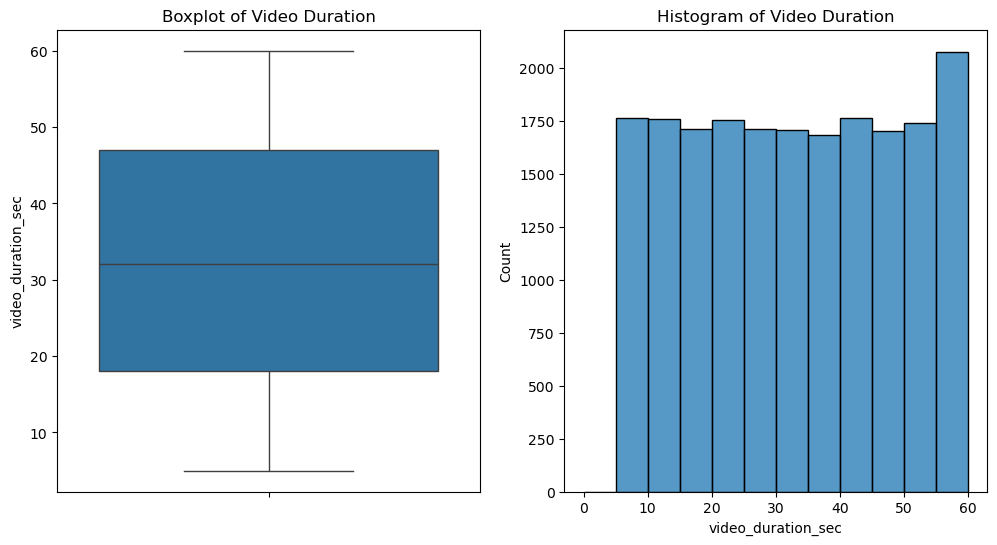

In [145]:
# Create a boxplot for `video_duration_sec`
# Create a histogram for `video_duration_sec`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_duration_sec'], ax = ax[0])
ax[0].set_title('Boxplot of Video Duration')
sns.histplot(data['video_duration_sec'], bins = range(0, 61, 5), ax = ax[1])
ax[1].set_title('Histogram of Video Duration')
plt.show()

The videos are 5-60 seconds long with a median around 32 seconds and uniformly distributed.

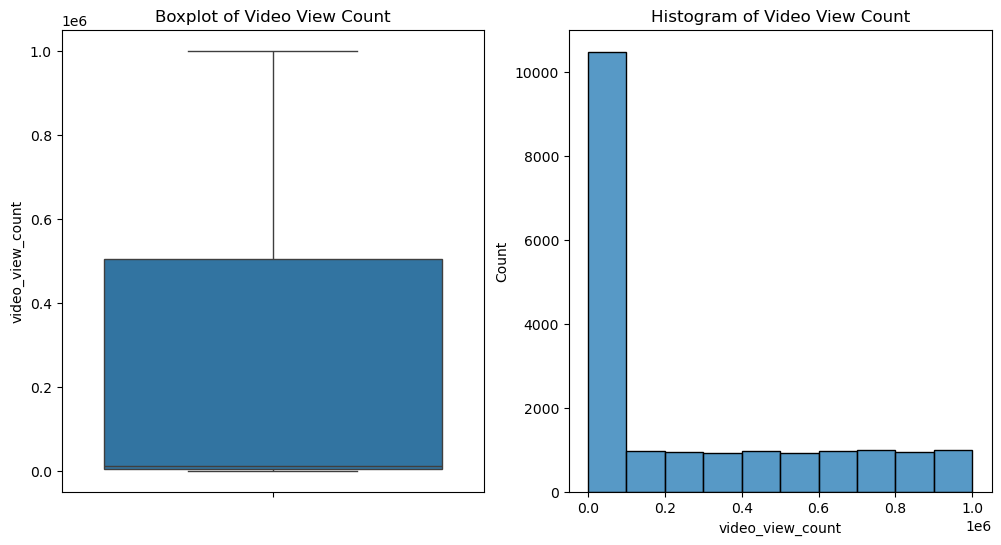

In [150]:
# Create a boxplot for `video_view_count`
# Create a histogram for `video_view_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_view_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video View Count')
sns.histplot(data['video_view_count'], bins = range(0, 1000001, 100000), ax = ax[1])
ax[1].set_title('Histogram of Video View Count')
plt.show()

The distribution of the `video_view_count` variable is positively skewed. There are some videos with more than one million views, but majority of the videos received less than 100,000 views.

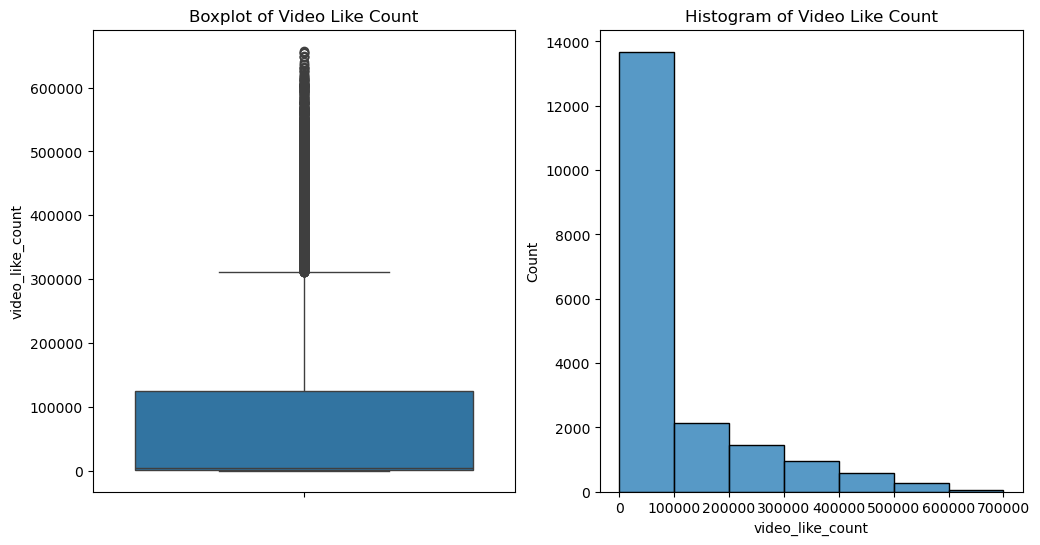

In [155]:
# Create a boxplot and histogram for `video_like_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_like_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Like Count')
sns.histplot(data['video_like_count'], bins = range(0, 7*10**5+1, 1*10**5), ax = ax[1])
ax[1].set_title('Histogram of Video Like Count')
plt.show()

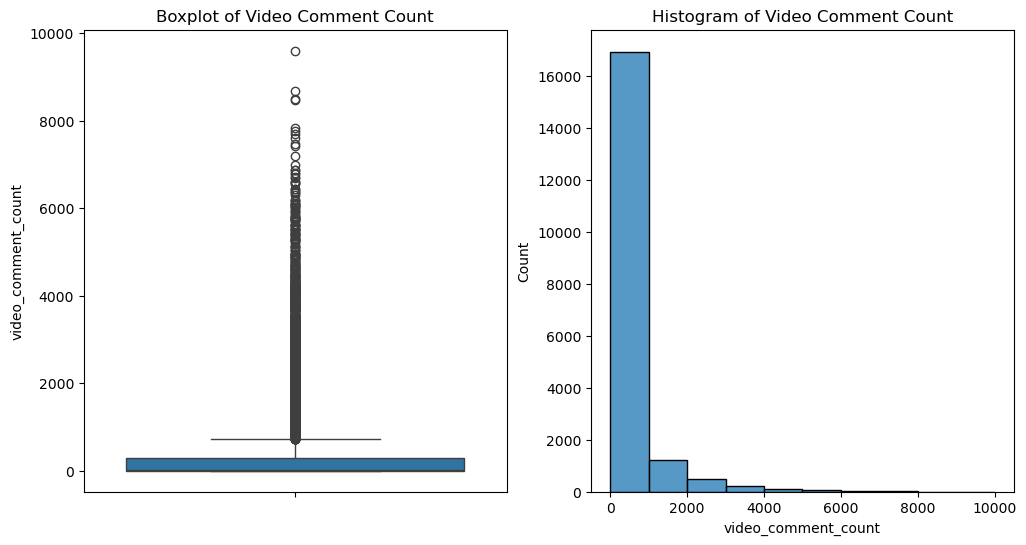

In [158]:
# Create a boxplot and histogram for `video_comment_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_comment_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Comment Count')
sns.histplot(data['video_comment_count'], bins = range(0, 10001, 1000), ax = ax[1])
ax[1].set_title('Histogram of Video Comment Count')
plt.show()

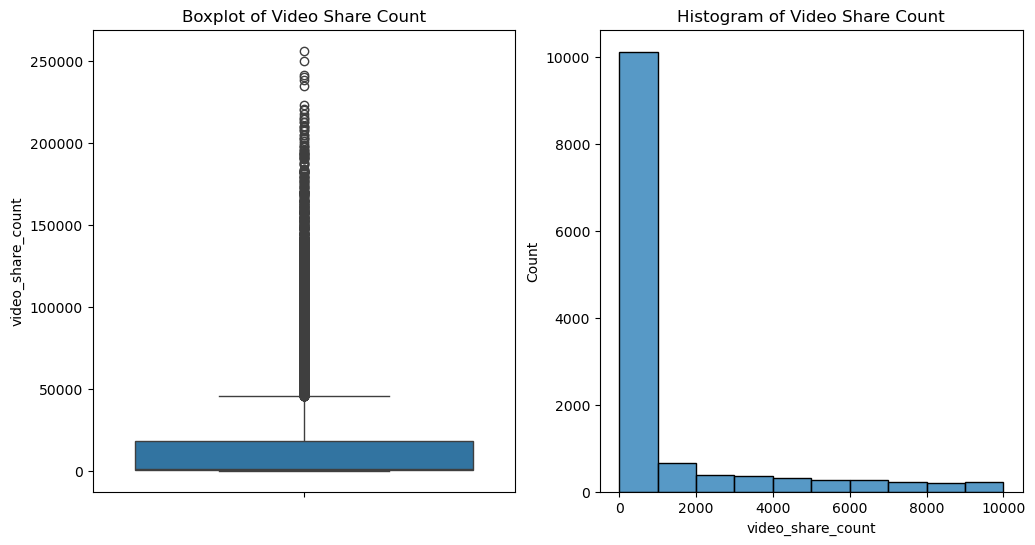

In [161]:
# Create a boxplot and histogram for `video_share_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_share_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Share Count')
sns.histplot(data['video_share_count'], bins = range(0, 10001, 1000), ax = ax[1])
ax[1].set_title('Histogram of Video Share Count')
plt.show()

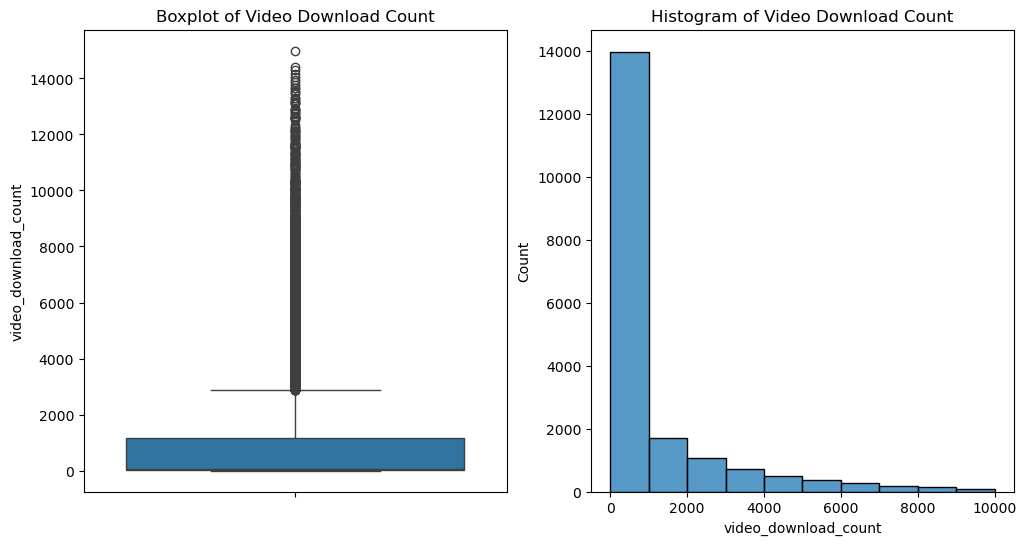

In [164]:
# Create a boxplot and histogram for `video_download_count`
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data['video_download_count'], ax = ax[0])
ax[0].set_title('Boxplot of Video Download Count')
sns.histplot(data['video_download_count'], bins = range(0, 10001, 1000), ax = ax[1])
ax[1].set_title('Histogram of Video Download Count')
plt.show()

The variables `video_like_count`, `video_comment_count`, `video_share_count`, and `video_download_count` all demonstrated similar properties:
* Contain extreme values
* Positively skewed

### 2.2.2 Claims Status

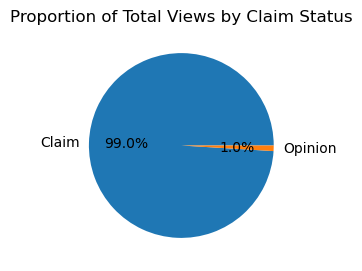

In [188]:
# Calculate a pie chart for total views by claim status
fig = plt.figure(figsize=(4,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['Claim', 'Opinion'], autopct='%1.1f%%')
plt.title('Proportion of Total Views by Claim Status');

The proportion of claim videos are much higher than opinion videos.

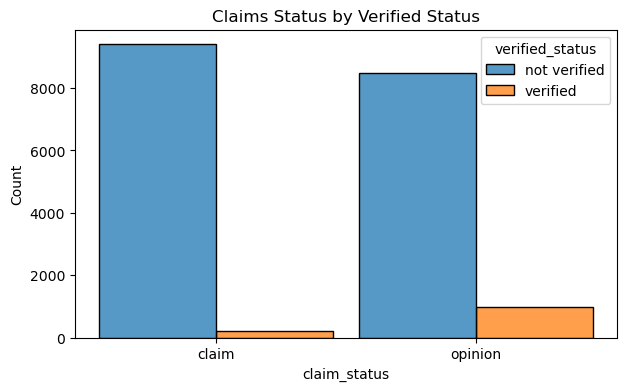

In [169]:
# Create a bar chart of claim status by verification status
plt.figure(figsize = (7, 4))
sns.histplot(data = data,
             x = 'claim_status',
             hue = 'verified_status',
             multiple = 'dodge',
             shrink = 0.9)
plt.title('Claims Status by Verified Status')
plt.show()

It is evident that majority of the reported videos are from unverified authors but a verified user seem to be more likely to post opinions than claims.

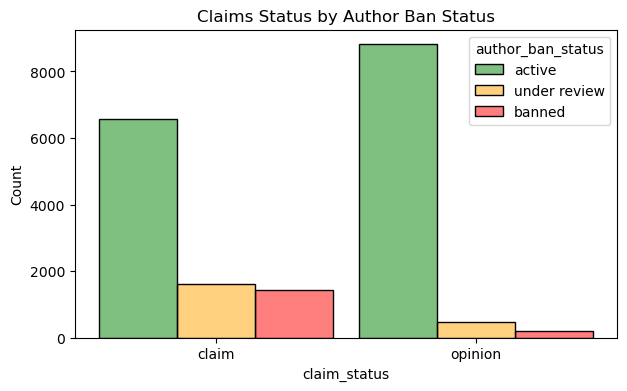

In [174]:
# Create a histogram of claim status by author ban status
plt.figure(figsize=(7, 4))
sns.histplot(data = data,
             x = 'claim_status',
             hue = 'author_ban_status',
             multiple = 'dodge',
             hue_order = ['active', 'under review', 'banned'],
             palette = {'active': 'green', 'under review': 'orange', 'banned': 'red'},
             alpha = 0.5,
             shrink = 0.9)
plt.title('Claims Status by Author Ban Status')
plt.show()

Fewer active authors report claims than opinions but banned and under review authors are more likely to post claims than opinions.

### 2.2.3 Video View Counts

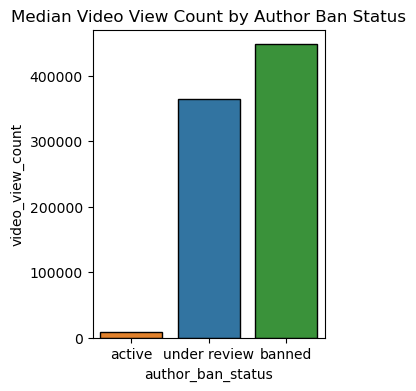

In [180]:
# Create a bar plot of median view counts by ban status
plt.figure(figsize = (3, 4))
sns.barplot(data = data,
            x = "author_ban_status",
            y = "video_view_count",
            hue = "author_ban_status",
            order = ["active", "under review", "banned"],
            estimator = "median",
            errorbar = None,
            edgecolor = "black")
plt.title("Median Video View Count by Author Ban Status")
plt.show()

The bar chart shows that banned and under review authors have a significant higher median view count than active authors.

We now know that banned and under review authors are more likely to post claims than opinions and they receive more engagement, then `video_view_count` might be a good indicator for claim status.

In [185]:
# Calculate the median for claim status
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

In [193]:
# Determine the number of outliers with interquartile range method
cols = ['video_view_count', 'video_like_count', 'video_comment_count', 'video_share_count', 'video_download_count']

for columns in cols:
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[columns] < lower_bound) | (data[columns] > upper_bound)]
    print(f'Number of outliers in {columns}: {len(outliers)}')

Number of outliers in video_view_count: 0
Number of outliers in video_like_count: 1726
Number of outliers in video_comment_count: 2789
Number of outliers in video_share_count: 2508
Number of outliers in video_download_count: 2450


Here we used the **interquartile range (IQR)** method to detect the outliers, where IQR is the difference between the third quartile and the first quartile.

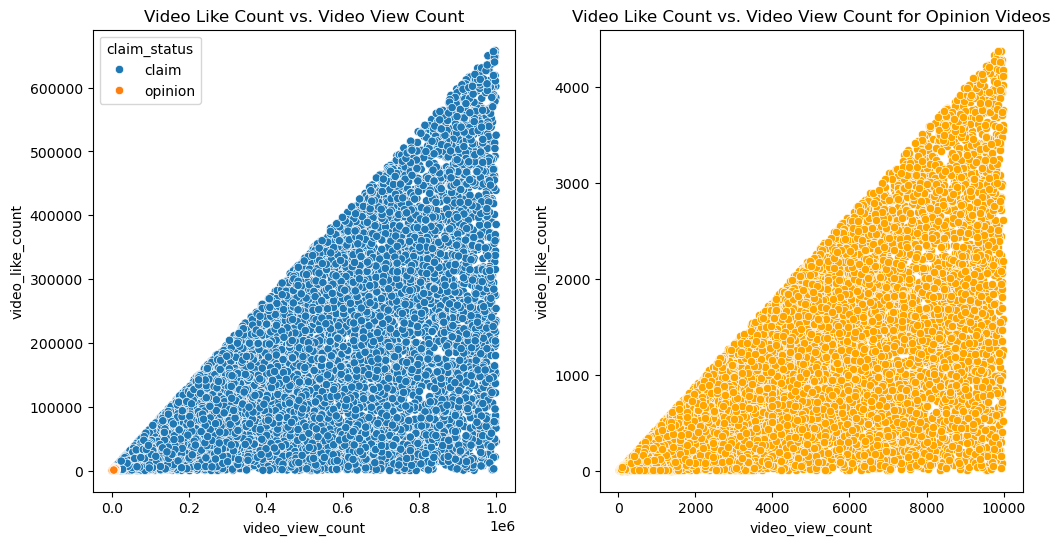

In [202]:
# Create a scatterplot of `video_view_count` vs `video_like_count` according to 'claim_status'
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data = data, x='video_view_count', y='video_like_count', hue = 'claim_status', ax=ax[0])
ax[0].set_title('Video Like Count vs. Video View Count')

sns.scatterplot(data = data[data['claim_status'] == 'opinion'], x='video_view_count', y='video_like_count', c = 'orange', ax=ax[1])
ax[1].set_title('Video Like Count vs. Video View Count for Opinion Videos');

We can tell that claim videos have much higher views and likes than opinion videos from the two scatterplots.

## 2.2 Summary

The dataset has approximately 20,000 rows and 12 columns (attributes). Most of the attributes are numerical with only four non-numeric attributes. Based on the visualisation plots, the attributes concerning likes, comments, shares, and downloads are highly skewed. The users of 'claim' videos are more likely to be 'banned' and 'under review'. We also know that video engagement are more related `claim_status` than `author_ban_status` as claim videos received more views, likes, and comments regardless of the user's ban status.

# 3. Statistical Test

We are interested if there is a significant difference in the number of views posted from verified accounts and unverified accounts. Hence, we formulate the following null hypothesis ($H_0$) and alternate hypothesis ($H_1$).

$H_0$: There is no significant difference between the number of views posted from verified accounts and unverified accounts. \
$H_1$: There is significant difference between the number of views posted from verified accounts and unverified accounts.

## 3.1 Data Cleaning

In [228]:
# Import packages for statistical analysis/hypothesis testing
from scipy import stats

In [230]:
# Determine missing data
data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [247]:
# Drop missing values and save as dataframe
data_clean = data.dropna(axis = 0)

## 3.2 Hypothesis Testing

In [252]:
# Compute the mean `video_view_count` for each group in `verified_status`
data_clean.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [255]:
# Conduct a two-sample t-test to compare the mean of `video_view_count` between verified and unverified accounts
verified = data_clean[data_clean['verified_status'] == 'verified']['video_view_count']
unverified = data_clean[data_clean['verified_status'] == 'not verified']['video_view_count']

tstat, pvalue = stats.ttest_ind(
    a = verified,
    b = unverified,
    equal_var = False)

print("t-statistic:", tstat)
print("p-value:", pvalue)

t-statistic: -25.499441780633777
p-value: 2.6088823687177823e-120


## 3.3 Interpretation
At 95% significance level, the $p \text{-value} = 2.61 \times 10^{-120}$ is much smaller than $\alpha = 0.05$. Hence, we reject $H_0$ and conclude that there is significant difference between the number of views posted from verified accounts and unverified accounts.


# 4. Regression Analysis

## 4.1 Objective

We will use a logistic regression model to predict verified status with video characteristics. The results may be used to inform the final model related to predicting whether a video is a claim or an opinion.

A logistic regression model rely on the following assumptions:
* The outcome variable, `verified_status` to be categorical.
* The observations are independent of each other.
* Independent variables should not be highly correlated to each other (small multicollinearity).
* Linear relationship of independent variables and logit of the outcome variable.
* Sample size is sufficiently large.

## 4.2 Data Cleaning and Preparation

In [268]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [270]:
# Determine duplicated values
data_clean.duplicated().sum()

0

There are no duplicated entries.

In [277]:
# Check for class balance for verified_status in percentage
data_clean['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. Hence, we use resampling to create class balance in the outcome variable.

In [294]:
# Identify data points from majority and minority classes
data_majority = data_clean[data_clean["verified_status"] == "not verified"]
data_minority = data_clean[data_clean["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [296]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [298]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func = lambda text: len(text))
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


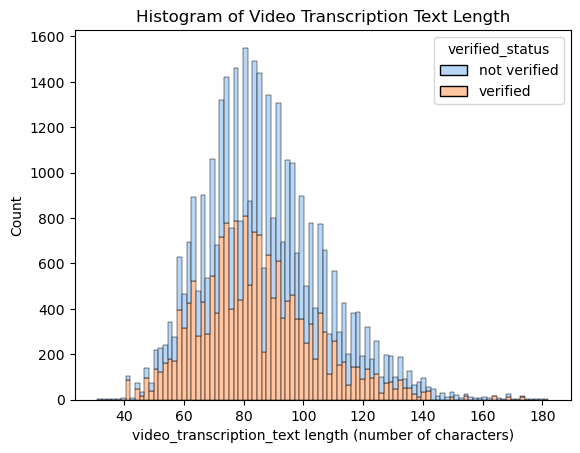

In [302]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts

sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Histogram of Video Transcription Text Length")
plt.show()

### 4.2.1 Examine Correlations

In [305]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


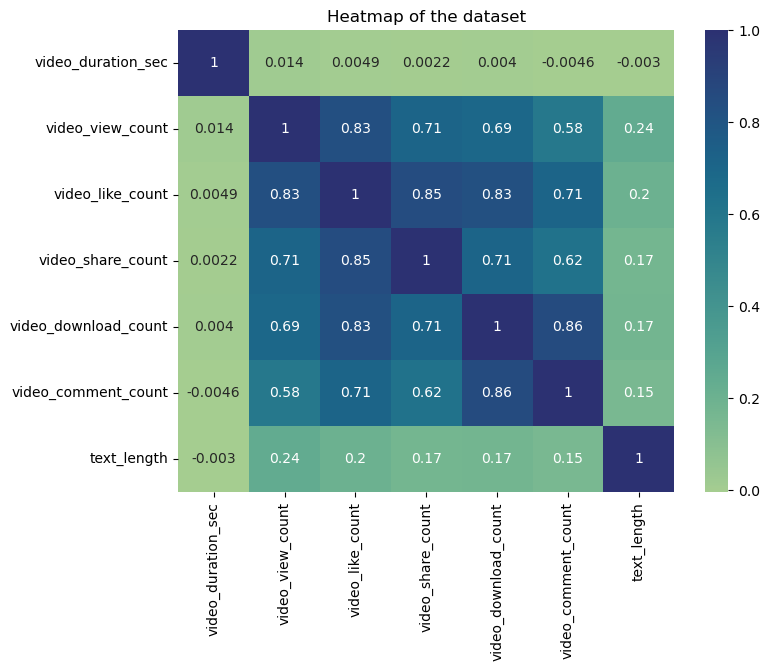

In [307]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

Based on the heatmap and correlation matrix, `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count` are all positively correlated with each other.

### 4.2.2 Model Formulation

In [338]:
# Select outcome variable
y = data_upsampled["verified_status"]

In [342]:
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


In [345]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [347]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [349]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_duration_sec    35768 non-null  int64  
 1   claim_status          35768 non-null  object 
 2   author_ban_status     35768 non-null  object 
 3   video_view_count      35768 non-null  float64
 4   video_share_count     35768 non-null  float64
 5   video_download_count  35768 non-null  float64
 6   video_comment_count   35768 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.9+ MB


In [351]:
# Get unique values in `claim_status`
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [353]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

We see that `claim_status` and `author_ban_status` are `object` data type. We will use one-hot encoding to make them numeric.

In [356]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [360]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [362]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [364]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [366]:
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [368]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [370]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train_dropped = X_train.drop(columns=["claim_status", "author_ban_status"])
X_train_dropped.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [372]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train_dropped.reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [374]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [376]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [378]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [380]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

In [382]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [384]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [386]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [388]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [390]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test_dropped = X_test.drop(columns=["claim_status", "author_ban_status"])
X_test_dropped.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.0,2.0
31748,27,5701.0,157.0,1.0,0.0
20197,31,449767.0,75385.0,5956.0,1789.0
5727,19,792813.0,56597.0,5146.0,3413.0
11607,54,2044.0,68.0,19.0,2.0


In [392]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
X_test_final = pd.concat([X_test_dropped.reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,1789.0,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,3413.0,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [398]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

In [400]:
# Encode the testing outcome variable
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

In [402]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### 4.2.3 Model Results

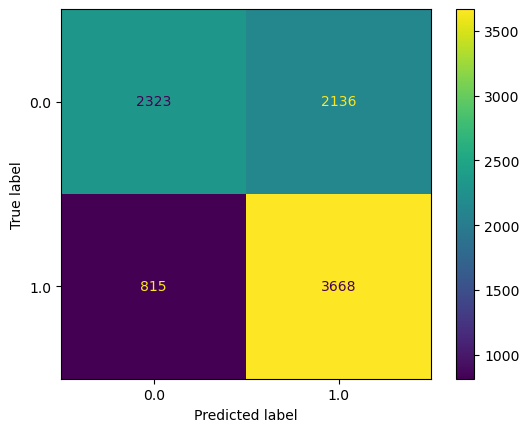

In [405]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

* Type I error (false positive): $\frac{2136}{2136+2323} \approx 0.479 $
* Type II error (false negative): $\frac{815}{815+3668} \approx 0.182$

In [409]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



In [412]:
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.415298e-03
1,video_view_count,-8.060706e-08
2,video_share_count,4.721085e-06
3,video_download_count,-1.737083e-04
4,video_comment_count,3.297218e-04
5,claim_status_opinion,1.635813e+00
6,author_ban_status_banned,-4.398950e-01
7,author_ban_status_under review,-1.097697e-01


Conclusion:
* The dataset has a few strongly correlated variables. We dropped `video_like_count` from the dataset as it breaks the "little to no multicollinearity" assumption.
* The logistic regression model had performed less ideal. The model predicts actual verified users with accuracy of 74%, but it also has a false positive rate of approximately 47%.

# 5. Machine Learning

Here, we want to develop a predictive model to classify whether a video contains a claim or an opinion. This model can help to reduce the backlog of user reports and improve the efficiency.

In [420]:
# Import relevant packages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import sklearn.metrics as metrics
import pickle

In [425]:
# Check class balance
print(data_clean["claim_status"].value_counts())
print()
print(data_clean["claim_status"].value_counts(normalize = True))

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64


In [429]:
# Extract the length of each `video_transcription_text`
# and add this as a column to the dataframe

data_mlm = data_clean.copy()
data_mlm["transcription_text_len"] = data_mlm["video_transcription_text"].str.len()
data_mlm.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [431]:
# Calculate the average `video_transcription_text` length for claims and opinions
data_mlm.groupby("claim_status")["transcription_text_len"].mean()

claim_status
claim      95.376978
opinion    82.722562
Name: transcription_text_len, dtype: float64

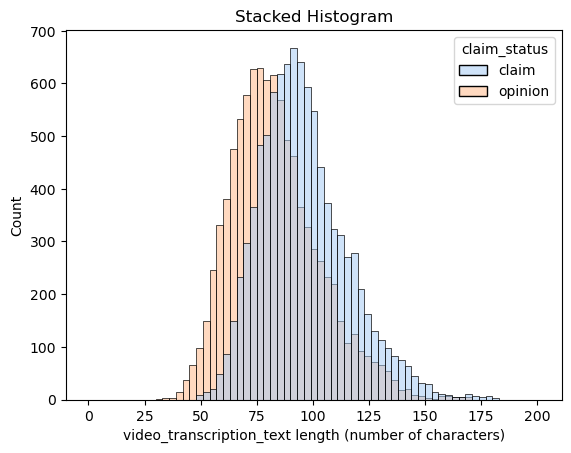

In [433]:
# Visualize the distribution of `video_transcription_text` length for claims and opinions
sns.histplot(data = data_mlm,
             x = "transcription_text_len",
             stat = "count",
             bins = range(0, 202, 3),
             multiple = "layer",
             kde = False,
             palette = "pastel", 
             hue = "claim_status",
             element ="bars",
             legend = True)
plt.title("Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.show()

## 5.1 Variable Encoding

In [436]:
# Map outcome variable
data_mlm["claim_status"] = data_mlm["claim_status"].map({"opinion" : False, "claim" : True})

# Encode other categorical variables as dummy variables
data_mlm = pd.get_dummies(data_mlm, columns = ["verified_status", "author_ban_status"], drop_first = True)
data_mlm.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_text_len,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,True,7017666017,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,2,True,4014381136,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,3,True,9859838091,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,4,True,1866847991,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,5,True,7105231098,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [438]:
# Assign variables
y = data_mlm["claim_status"]
X = data_mlm.drop(columns = ["claim_status", "#", "video_id", "video_transcription_text"])

In [440]:
# Split data into training and test sets, 80/20
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 0)

In [442]:
# Split the training data into training and validation sets, 75/25 to obtain final ratio 60/20/20 
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size = 0.25, stratify = y_tr, random_state = 0)

In [444]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11450, 10), (11450,), (3817, 10), (3817,), (3817, 10), (3817,))

## 5.2 Model Building

### 5.2.1 Random Forest Model

In [451]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators" : [50, 100],
             "max_depth" : [5, 10],
             "min_samples_leaf" : [1, 3],
             "min_samples_split" : [2, 4],
             "max_features" : [5, None]}

# Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf,
                     cv_params,
                     scoring = scoring,
                     cv = 5,  # cross-validation with number of folds
                     refit = "recall",  # score to optimize
                     n_jobs = -1,  # use all processors to run in parallel
                     verbose = 1)  # display computation time for each fold

In [453]:
%%time

# Fit the model
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: total: 1.16 s
Wall time: 22.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [5, None],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [455]:
# Examine best recall score
rf_cv.best_score_

0.9901115447624556

In [457]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

This model performs very well with an average recall score of 0.991 across the five cross-validation folds. It is evident that our model is making accurate classifications.

### 5.2.2 XGBoost Model

In [463]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [465]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 4min 43s
Wall time: 32.1 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [467]:
xgb_cv.best_score_

0.988550249349523

In [469]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

## 5.3 Model Evaluation

### 5.3.1 Random Forest

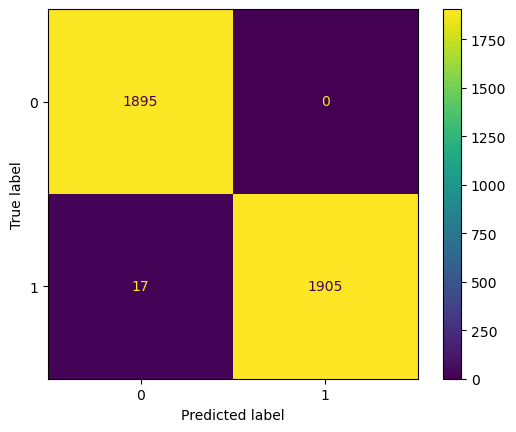

In [480]:
# Use the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val)

# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=None)

# Plot confusion matrix
disp.plot()
# Display plot
plt.show()

In [482]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1895
       claim       1.00      0.99      1.00      1922

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



The classification report above shows that the random forest model scores were near to perfect. The confusion matrix indicates that there were 17 misclassifications — there were no false postives and seventeen false negatives.

### 5.3.2 XGBoost

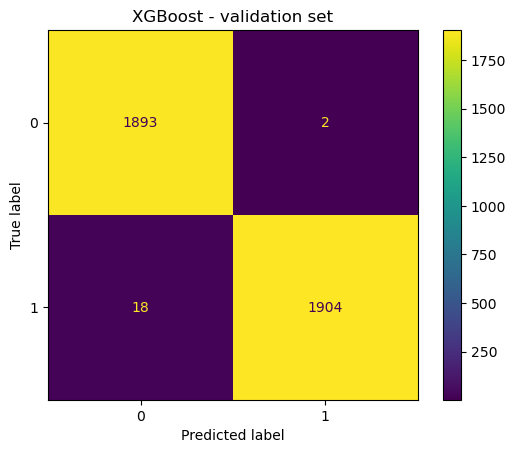

In [489]:
# Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val)

# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()

In [491]:
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1895
       claim       1.00      0.99      0.99      1922

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



The results of the XGBoost model were also close to perfect. However, it has more errors (both false positive and false negative) compared to the random forest model. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a slightly better recall score, and is therefore the champion model.

## 5.4 Prediction with Champion Model

In [495]:
# Use champion model to predict on test data
y_pred = rf_cv.best_estimator_.predict(X_test)

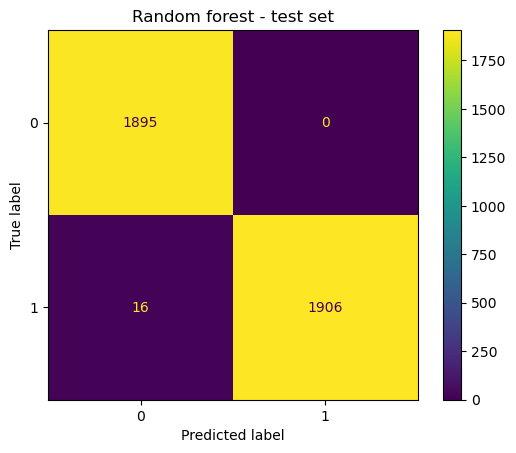

In [497]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)

# Plot confusion matrix
disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

In [499]:
target_labels = ['opinion', 'claim']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1895
       claim       1.00      0.99      1.00      1922

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



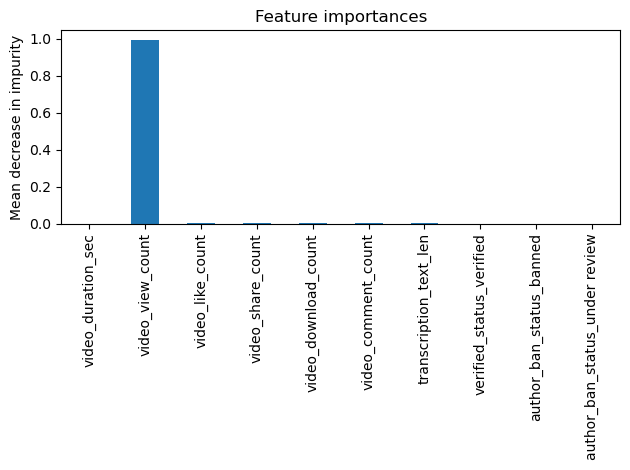

In [507]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

The most predictive features were all related to engagement levels generated by the video.

# 6. Conclusion

* We explored two tree-based machine learning models to classify future videos as claim or opinion. It was confirmed that the model's most predictive features were all related to video engagement from the champion model. 

* Our statistical analysis showed that there is a significant difference in the number of views between the videos posted by verified and unverified users. The logistic regression model performed poorly in classifying "verified" users versus "not verified". Moreover, video engagement seems to tie to `claim_status` than `author_ban_status`. Both phenomenons suggest a potential relationship between `claim_status` and `verified_status`.

* We would recommend this model because it performed well on both the validation and test data. Furthermore, both precision and F1 scores were consistently high. The model very successfully classified claims and opinions.

* The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.

* The 'video_transcription_text' feature was dropped as it was text-based and not a categorical feature that could be encoded easily. However we could explore the use of natural language processing to transform it into a usable feature.